    Department Of Computer Science
    COMP4381, SP.TOP: DATA SCIENCE AND ANALYTICS
    Dr. Hussein Soboh
    COMP4381 | Section 1 

## <div align=center> Assignment #7 </div>
<div align=center><b> 3D prints roughness dataset</b></div>
<div align=center>Linear Regression pipeline for the Roughness of the 3D prints</div>

    Prepeared by: Sondos Aabed
    ID: 1190652

## Table of Contents

- Introduction
- Tools and Versions
- Data Analysis Process
    - Data Wrangling
    - Data preparation for modeling
        - Feature scaling.
        - Feature selection.
        - Data splitting.
- Data Modeling Processing
    - Algorithm
    - Training 
    - Testing
    - Evaluation
        - performance metrics
        - bias, variance tradeoff
- Insights and Conclusions
    
<hr>

## Introduction
Working on 3D printed pieces, could face the challenge of having to reinforce them totally or locally in order to improve their strength and durability. It could be a whole part or a specific area subjected to some kind of load, such as compression, tension, shear, torsion, or bending. [1]
The aim of the noteboook is to determine how much of the adjustment parameters in 3d printers affect the print quality, accuracy and strenght it's more of a product quality task. Where there are nine setting parameters and three measured output parameters one of which that is the targeted (Roughness)

![5l7W9Cj1eGhVgFhuIfNKzirVA2v861pZ4xIW84T4qOw](https://github.com/sondosaabed/SP.TOP-Data-Science-and-Analytics/assets/65151701/cbf8ec7f-7490-4e67-8cfb-b37ac1cf4799)

**Figure 1:** Zurikh Artificail parts [4]

In this assignment, a dataset of 3D prints roughness and other features is used. The roughness is a measure of how rough the 3D printed part is. It is the target feature for this assignment, where the roughness a numerical value that will be predicted using linear regression.

### About the dataset

This dataset comes from research by TR/Selcuk University Mechanical Engineering department.[3]

Here is the [Kaggle Link of the Dataset](https://www.kaggle.com/datasets/afumetto/3dprinter/data?select=data.csv)

The dataset contains the following features:

|Feature|Type|Description|
|-----|-----|-----|
|Layer Height (mm)| numerical| 
| Wall Thickness (mm)| numerical|
| Infill Density (%)| numerical|Percentage of the object's interior filled with material.|
| Infill Pattern ()|ordinal| The geometric pattern used to fill the interior of the object.|
| Nozzle Temperature (Cº)|numerical| Temperature of the material exiting the printer nozzle.|
| Bed Temperature (Cº)|numerical| Temperature of the printer bed where the object is laid down.|
| Print Speed (mm/s)|numerical| Speed at which the printer nozzle travels while printing.|
| Material () | nominal | The filament or material used for printing the object.|
| Fan Speed (%)|numerical|

The target feature is: Roughness (µm)

The following figure shows what is means to have diffrent types of infill patterns and diffrent types of infill densities.
![main-qimg-70b737714f100e1b57c6c22d5d60effb](https://github.com/sondosaabed/SP.TOP-Data-Science-and-Analytics/assets/65151701/0c15e3ba-431e-40c0-b0f2-21d0401ad8fe)

**Figure 2:** fill patterns in 3D printing [2]

![image](https://github.com/sondosaabed/SP.TOP-Data-Science-and-Analytics/assets/65151701/73270f3c-15bd-464e-80f9-37904260d7f3)

**Figure 3:** Material PLA vs ABS [5]

<hr>

## Tools and Versions

The following tools and versions are utiliize through this reporting:

|Tool | Version |
|-----|---------|
|Python|3.12.2|
|Numpy|1.26.4|
|Matplotlib|3.8.2|
|Pandas|2.2.1|
|Sckitlearn||
|Visual Studio Code |Updated|
|Git & github|[Repo.](https://github.com/sondosaabed/SP.TOP-Data-Science-and-Analytics/blob/main/Assignments/A7-3D-prints-Roughness/1190652_A7.ipynb)|

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

c:\Users\SS\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<hr>

## Data Analysis Process

### Data Wrangling

In this section, the data wrangling process is followed wehre first the dataset is loaded and it goes through assessment and cleansing. Inluding aspectes of structural probelms and outliers, duplicaes or missing values.

#### Loading the Dataset

In [2]:
def load_data(path="./3d-printing-roughness.csv"):
    """
    Loads the csv data into the pandas data frame
    Args:
        path (string): path to the data, deafult value is the file name
    Returns:
        (pd.DataFrame): data frame contains the file data (pd.DataFrame)
    """
    df = None
    if path.endswith(".csv"):
        df = pd.read_csv(path)
    return df

In [3]:
df = load_data()
df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


<hr>

#### Assessing and Cleaning the datasets
In this section the following steps will be conducted:
- Assess and handle Columns and Data types
- Assess and handle Duplicates
- Assess and handle Missing Values
-  Assess and handle Outliers

##### Assessing and handling Columns and Data types

- Since one the requiremnts is to have an ordinal feature this feature has the notion of order on it regarding the structure and the infill pattern used where the higher the rank the more complex the pattern used in the design.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        50 non-null     float64
 1   wall_thickness      50 non-null     int64  
 2   infill_density      50 non-null     int64  
 3   infill_pattern      50 non-null     object 
 4   nozzle_temperature  50 non-null     int64  
 5   bed_temperature     50 non-null     int64  
 6   print_speed         50 non-null     int64  
 7   material            50 non-null     object 
 8   fan_speed           50 non-null     int64  
 9   roughness           50 non-null     int64  
 10  tension_strenght    50 non-null     int64  
 11  elongation          50 non-null     float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.8+ KB


In [5]:
df.nunique()

layer_height           5
wall_thickness        10
infill_density         9
infill_pattern         2
nozzle_temperature     9
bed_temperature        5
print_speed            3
material               2
fan_speed              5
roughness             44
tension_strenght      26
elongation            27
dtype: int64

 for the infill_pattern categorical feature because it have the notion of order the higher means the more complex the structure is we can replace the grid = 0 and honeycomb = 1 instead of one hot encoding.

In [6]:
df.infill_pattern = [0 if each == "grid" else 1 for each in df.infill_pattern] 

for the second categorical feature which is the material it doesn't have the notion of order so it had to go through one hot encoding:

In [7]:
df = pd.get_dummies(df, columns=['material'], dtype=int)

In [8]:
df.sample(5)

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation,material_abs,material_pla
11,0.06,2,20,1,225,65,60,25,92,12,1.4,1,0
31,0.15,7,10,1,225,65,60,25,154,19,1.8,1,0
44,0.20,3,80,0,250,80,40,100,357,21,1.1,1,0
1,0.02,7,90,1,225,65,40,25,32,16,1.4,1,0
10,0.06,6,80,0,220,60,60,0,75,37,2.4,1,0


> Now all the dataset is numerical values.

##### Assess and handle Duplicates
Now let's check for duplicates and handle them

In [9]:
df.duplicated().any()

False

> There are no duplicates records found.

##### Assess and handle Missing Values
This is the final section of cleaning the dataset, it is about detecting and handling the missing values.

In [10]:
df.isna().sum().sort_values()

layer_height          0
wall_thickness        0
infill_density        0
infill_pattern        0
nozzle_temperature    0
bed_temperature       0
print_speed           0
fan_speed             0
roughness             0
tension_strenght      0
elongation            0
material_abs          0
material_pla          0
dtype: int64

> There are no missing records found.

##### Assess and handle Outliers
Now let's check for outliers with visualization using boxplot.

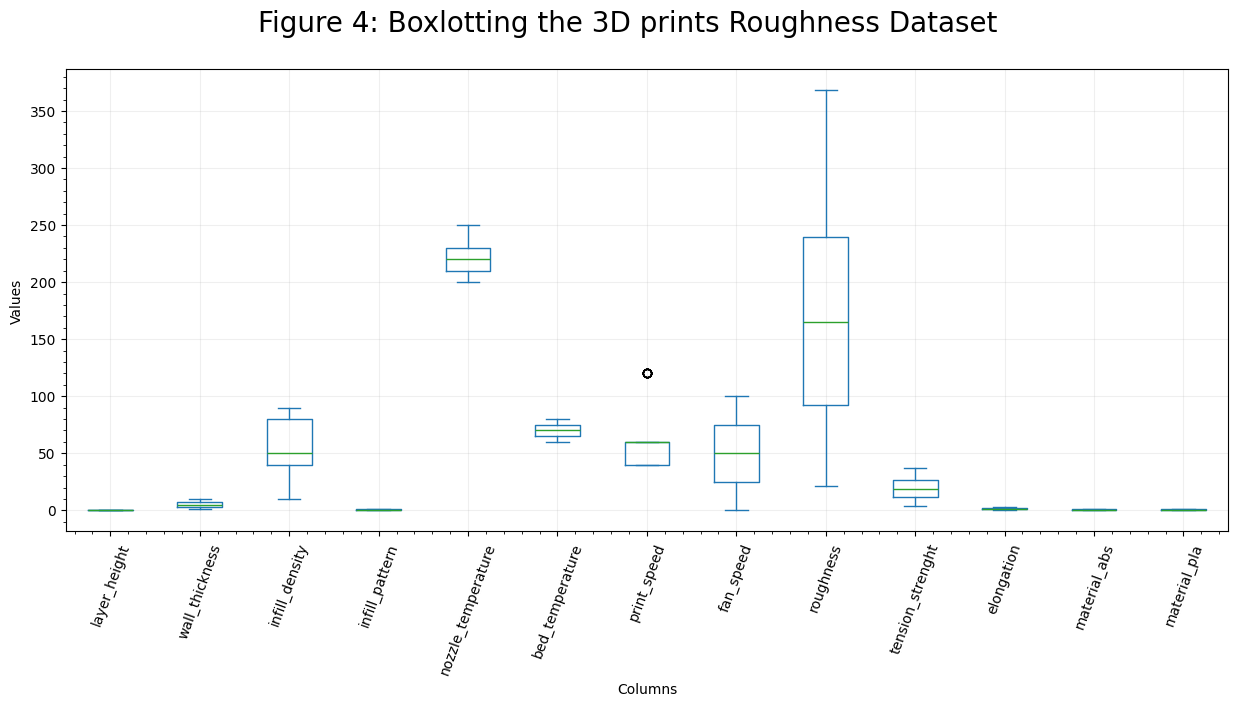

In [11]:
df.plot(kind='box',figsize=(15, 6));
plt.xlabel('Columns')  
plt.ylabel('Values') 
plt.grid(True, alpha=0.2)
plt.minorticks_on()
plt.suptitle('Figure 4: Boxlotting the 3D prints Roughness Dataset', size=20)
plt.tick_params(axis='x', rotation=70) 
plt.show()

> The print_speed has an upper bound outlier.

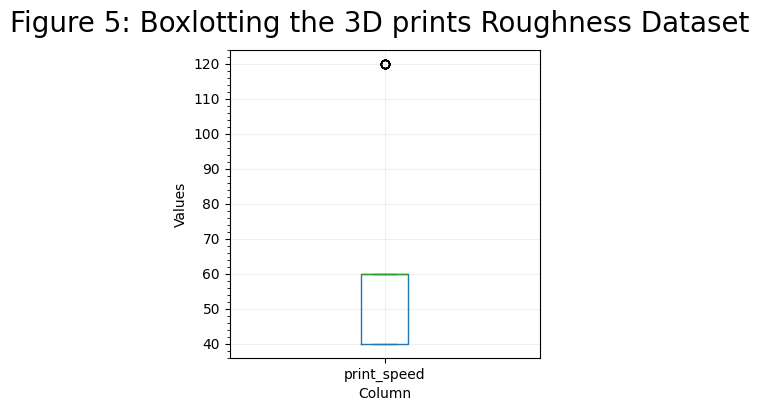

In [12]:
df['print_speed'].plot(kind='box',figsize=(4, 4));
plt.xlabel('Column')  
plt.ylabel('Values') 
plt.grid(True, alpha=0.2)
plt.minorticks_on()
plt.suptitle('Figure 5: Boxlotting the 3D prints Roughness Dataset', size=20)
plt.tick_params(axis='x') 
plt.show()

> The outlier is the record that has the speed of printing as 120, let's take a further look into the records that has that speed.

In [13]:
df[df['print_speed']== 120]

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation,material_abs,material_pla
20,0.1,1,40,0,220,60,120,0,120,16,1.2,1,0
21,0.1,2,30,1,225,65,120,25,144,12,1.1,1,0
22,0.1,1,50,0,230,70,120,50,265,10,0.9,1,0
23,0.1,9,80,1,240,75,120,75,312,19,0.8,1,0
24,0.1,2,60,0,250,80,120,100,368,8,0.4,1,0
25,0.1,1,50,1,200,60,120,0,180,11,1.6,0,1
26,0.1,4,40,0,205,65,120,25,176,12,1.2,0,1
27,0.1,3,50,1,210,70,120,50,128,18,1.8,0,1
28,0.1,4,90,0,215,75,120,75,138,34,2.9,0,1
29,0.1,1,30,1,220,80,120,100,121,14,1.5,0,1


> There seem to be many records that have the printing speed of 120, it is decided to keep these records as a reasonable speed of printing.

## Data preparation for modeling
In this section the following steps will be conducted:
- Spliting into testing and training subsets.
- Feature scaling.
- Feature Selection and correlation.

### Feature Selection and correlation analysis
Since numerical outliers were detected, the feature scaling will be performed using the standard scaler. 

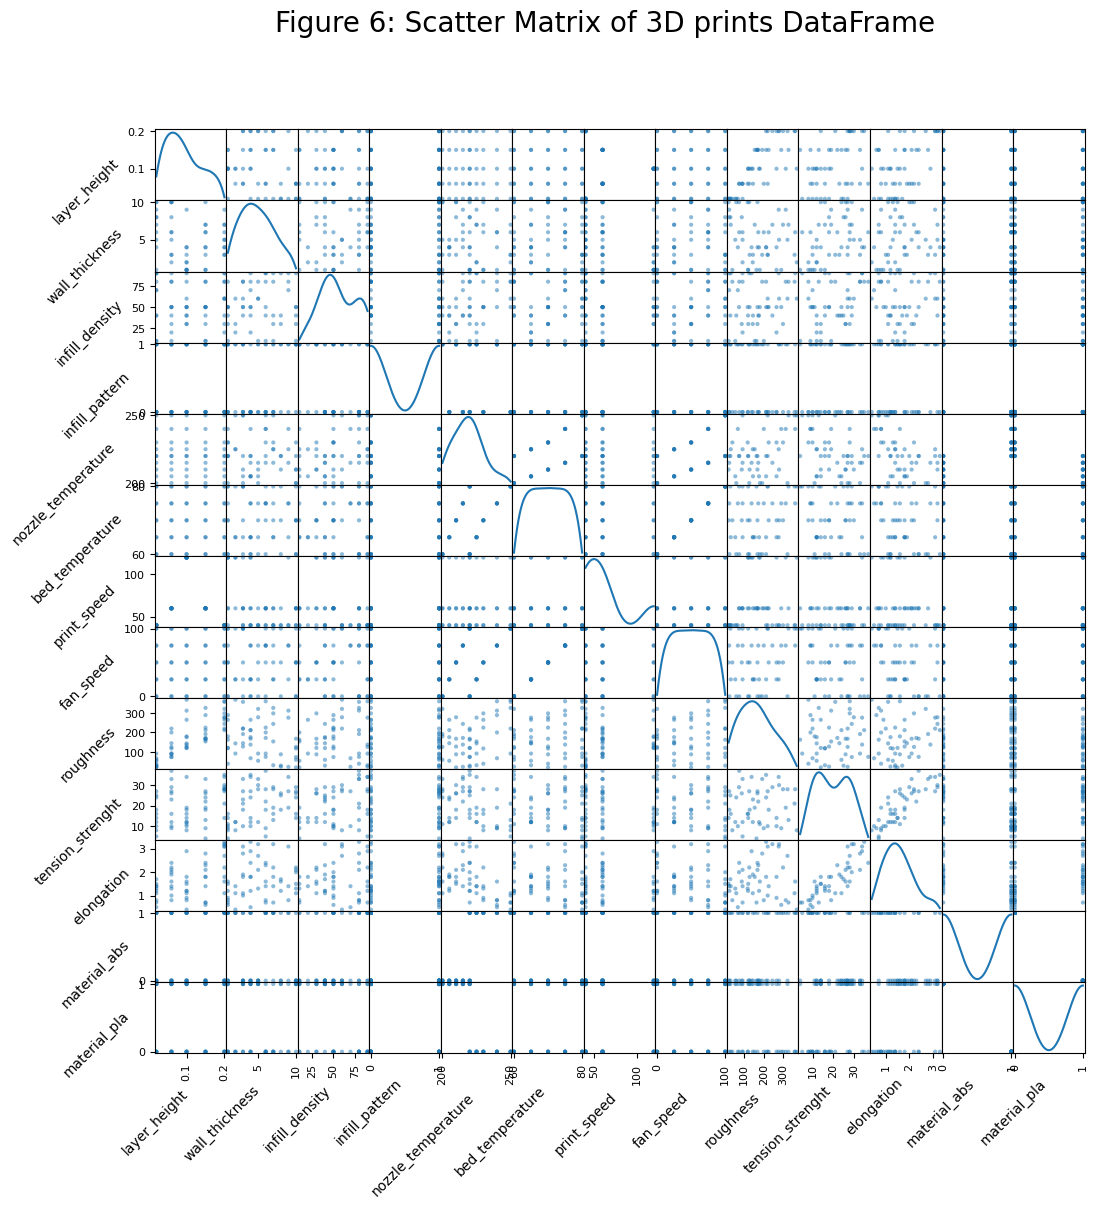

In [14]:
scatter_matrix = pd.plotting.scatter_matrix(df,  figsize=(12, 12), diagonal='kde')
plt.suptitle('Figure 6: Scatter Matrix of 3D prints DataFrame', size=20)
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), rotation=45, ha='right')
    ax.set_ylabel(ax.get_ylabel(), rotation=45, ha='right')

> It is noticed that the target feature scatter plots with each of the features doesn't actually show correlation, only there is a slight positive correlation with the layer_height feature, it seems to have a positive trend.

> The feature infill pattern seems to have no correlation with all of the features.

> The feature infill density have positive correlation with the three measures of roughness, tension_strength and elongation.

> Nozzel temrature shows positive trend with bed_temperature, and fan_speed feature.

> Fan_speed and bed_temperature are likely to have a very high correlation it shows a linear strong line.

> print_speed is not showing any positive or negative trends with the other features.

> tension_strength is positvly correlated with the elongation feature. and the elongantion shows also a positive trend with tension_strength.

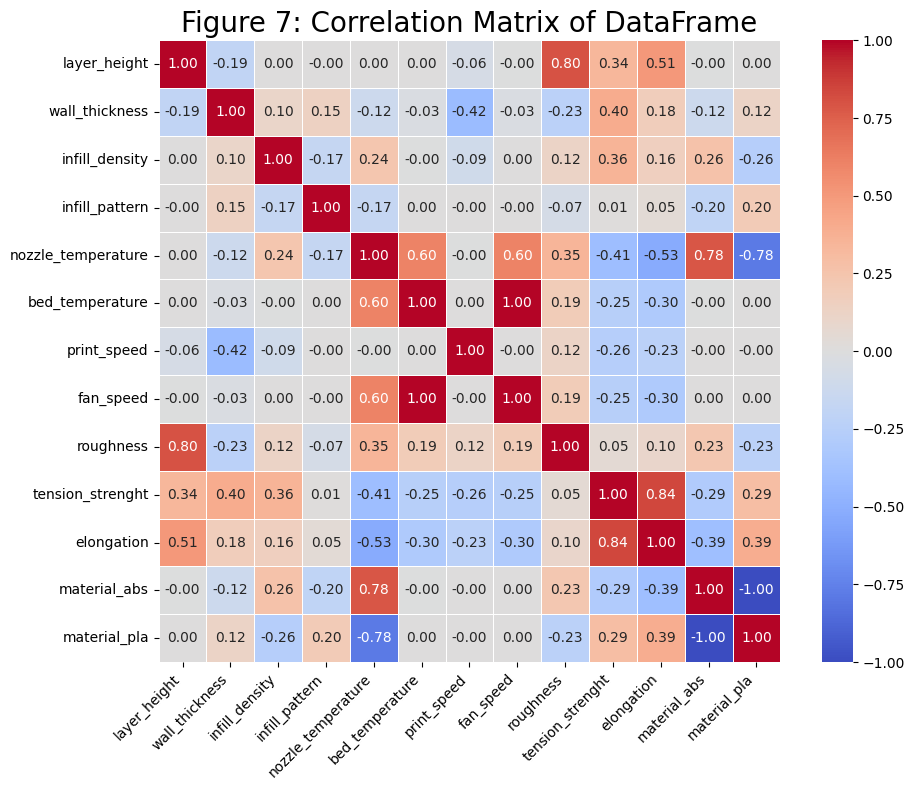

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, cbar=True, linewidths=0.5, square=True)      
plt.title('Figure 7: Correlation Matrix of DataFrame', size=20)
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

> It is noticed that there is a very high possitive correlation 0.8 with the layer_height and the target feature.

> There is positive low correlation with the material of abd and negative correlation with the material of pla and the target feature.

> There is a very low almost zero correlation with tension_strength and the target feature. And a very low almost zero correlation but negative with the infill_pattern feature.

> the decision is to drop the infill_pattern feature and tension_strength feature in the first experiment.

In [22]:
selected_features = set(df.columns) - set(['roughness','infill_pattern', 'tension_strength'])
selected_features = list(selected_features)
selected_features

['material_pla',
 'nozzle_temperature',
 'wall_thickness',
 'infill_density',
 'layer_height',
 'fan_speed',
 'material_abs',
 'elongation',
 'print_speed',
 'bed_temperature',
 'tension_strenght']

### Dataset Splitting
The splitting rule used is the 80:20 split train:test.

There will be two modeling experminets, one with all features and the otehr with only the selected features based on the previous section:

In [18]:
y = df['roughness']
display(y.head())

0    25
1    32
2    40
3    68
4    92
Name: roughness, dtype: int64

> Selected Features

In [23]:
X_1 = df[selected_features]
display(X_1.head())

,material_pla,nozzle_temperature,wall_thickness,infill_density,layer_height,fan_speed,material_abs,elongation,print_speed,bed_temperature,tension_strenght
0,0,220,8,90,0.02,0,1,1.2,40,60,18
1,0,225,7,90,0.02,25,1,1.4,40,65,16
2,0,230,1,80,0.02,50,1,0.8,40,70,8
3,0,240,4,70,0.02,75,1,0.5,40,75,10
4,0,250,6,90,0.02,100,1,0.7,40,80,5


> All Features

In [24]:
X_2 = df.drop(columns=['roughness'])
display(X_2.head())

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,fan_speed,tension_strenght,elongation,material_abs,material_pla
0,0.02,8,90,0,220,60,40,0,18,1.2,1,0
1,0.02,7,90,1,225,65,40,25,16,1.4,1,0
2,0.02,1,80,0,230,70,40,50,8,0.8,1,0
3,0.02,4,70,1,240,75,40,75,10,0.5,1,0
4,0.02,6,90,0,250,80,40,100,5,0.7,1,0


> Splitting with 80:20 rule:

In [25]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y, test_size=0.2, random_state=1190652)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y, test_size=0.2, random_state=1190652)

### Feature scaling
Since numerical outliers were detected, the feature scaling will be performed using the standard scaler. 

In [26]:
X_train_1.describe().T

,count,mean,std,min,25%,50%,75%,max
material_pla,40.0,0.55000,0.503831,0.00,0.00,1.0,1.000,1.0
nozzle_temperature,40.0,220.62500,15.114414,200.00,210.00,220.0,230.000,250.0
wall_thickness,40.0,5.50000,2.855494,1.00,3.00,5.0,8.000,10.0
infill_density,40.0,53.00000,26.428423,10.00,30.00,50.0,80.000,90.0
layer_height,40.0,0.10275,0.065554,0.02,0.06,0.1,0.150,0.2
fan_speed,40.0,50.62500,35.122268,0.00,25.00,50.0,75.000,100.0
material_abs,40.0,0.45000,0.503831,0.00,0.00,0.0,1.000,1.0
elongation,40.0,1.65250,0.733795,0.40,1.10,1.6,2.125,3.2
print_speed,40.0,63.50000,30.004273,40.00,40.00,60.0,60.000,120.0
bed_temperature,40.0,70.12500,7.024454,60.00,65.00,70.0,75.000,80.0


In [27]:
X_train_2.describe().T

,count,mean,std,min,25%,50%,75%,max
layer_height,40.0,0.10275,0.065554,0.02,0.06,0.1,0.150,0.2
wall_thickness,40.0,5.50000,2.855494,1.00,3.00,5.0,8.000,10.0
infill_density,40.0,53.00000,26.428423,10.00,30.00,50.0,80.000,90.0
infill_pattern,40.0,0.52500,0.505736,0.00,0.00,1.0,1.000,1.0
nozzle_temperature,40.0,220.62500,15.114414,200.00,210.00,220.0,230.000,250.0
bed_temperature,40.0,70.12500,7.024454,60.00,65.00,70.0,75.000,80.0
print_speed,40.0,63.50000,30.004273,40.00,40.00,60.0,60.000,120.0
fan_speed,40.0,50.62500,35.122268,0.00,25.00,50.0,75.000,100.0
tension_strenght,40.0,20.20000,8.497964,4.00,12.75,20.0,27.000,37.0
elongation,40.0,1.65250,0.733795,0.40,1.10,1.6,2.125,3.2


> Looking at the maximum and minimum values or the range of each of the numerical feature, the data contains diffrent scales of features so the decision is to make the step of feature scaling.

> only the selected features:

In [28]:
scaler_1 = StandardScaler()
X_train_scaled_1 = pd.DataFrame(scaler_1.fit_transform(X_train_1))
X_test_scaled_1 = pd.DataFrame(scaler_1.transform(X_test_1))
display(X_train_scaled_1.sample(5))
display(X_train_scaled_1.describe().T)

,0,1,2,3,4,5,6,7,8,9,10
22,0.904534,-1.381975,-0.177332,0.268241,1.502401,-1.459756,-0.904534,1.445696,-0.793200,-1.459756,0.929560
14,0.904534,-1.046951,-0.177332,-1.647764,-1.278393,-0.738889,-0.904534,-0.486499,-0.793200,-0.738889,-0.977230
31,0.904534,-0.041878,0.886659,-0.498161,-1.278393,1.423712,-0.904534,0.065557,-0.793200,1.423712,0.572037
30,-1.105542,0.293146,1.241322,1.417843,1.502401,-0.738889,1.105542,1.997752,-0.793200,-0.738889,1.644606
15,0.904534,-1.046951,-0.886659,-0.498161,-0.660438,-0.738889,-0.904534,0.341584,-0.118136,-0.738889,0.333688


,count,mean,std,min,25%,50%,75%,max
0,40.0,-1.332268e-16,1.012739,-1.105542,-1.105542,0.904534,0.904534,0.904534
1,40.0,0.000000e+00,1.012739,-1.381975,-0.711927,-0.041878,0.628171,1.968268
2,40.0,0.000000e+00,1.012739,-1.595986,-0.886659,-0.177332,0.886659,1.595986
3,40.0,4.440892e-17,1.012739,-1.647764,-0.881362,-0.114960,1.034642,1.417843
4,40.0,-9.992007e-17,1.012739,-1.278393,-0.660438,-0.042484,0.729958,1.502401
5,40.0,-5.551115e-18,1.012739,-1.459756,-0.738889,-0.018022,0.702845,1.423712
6,40.0,2.220446e-17,1.012739,-0.904534,-0.904534,-0.904534,1.105542,1.105542
7,40.0,2.220446e-16,1.012739,-1.728625,-0.762527,-0.072457,0.652116,2.135766
8,40.0,-4.440892e-17,1.012739,-0.793200,-0.793200,-0.118136,-0.118136,1.907054
9,40.0,-5.551115e-18,1.012739,-1.459756,-0.738889,-0.018022,0.702845,1.423712


> All features:

In [29]:
scaler_2 = StandardScaler()
X_train_scaled_2 = pd.DataFrame(scaler_2.fit_transform(X_train_2))
X_test_scaled_2 = pd.DataFrame(scaler_2.transform(X_test_2))
display(X_train_scaled_2.sample(5))
display(X_train_scaled_2.describe().T)

,0,1,2,3,4,5,6,7,8,9,10,11
12,-1.278393,0.531995,1.417843,0.95119,0.293146,-0.738889,-0.793200,-0.738889,-0.500532,-0.348485,1.105542,-1.105542
21,-0.042484,-0.886659,-0.114960,0.95119,-0.711927,-0.018022,1.907054,-0.018022,-0.262184,0.203571,-0.904534,0.904534
4,-0.042484,-1.595986,-0.114960,0.95119,-1.381975,-1.459756,1.907054,-1.459756,-1.096404,-0.072457,-0.904534,0.904534
30,1.502401,1.241322,1.417843,0.95119,0.293146,-0.738889,-0.793200,-0.738889,1.644606,1.997752,1.105542,-1.105542
38,0.729958,-1.595986,-1.647764,0.95119,-0.041878,1.423712,-0.118136,1.423712,-1.930625,-1.314583,-0.904534,0.904534


,count,mean,std,min,25%,50%,75%,max
0,40.0,-9.992007e-17,1.012739,-1.278393,-0.660438,-0.042484,0.729958,1.502401
1,40.0,0.000000e+00,1.012739,-1.595986,-0.886659,-0.177332,0.886659,1.595986
2,40.0,4.440892e-17,1.012739,-1.647764,-0.881362,-0.114960,1.034642,1.417843
3,40.0,-3.885781e-17,1.012739,-1.051315,-1.051315,0.951190,0.951190,0.951190
4,40.0,0.000000e+00,1.012739,-1.381975,-0.711927,-0.041878,0.628171,1.968268
5,40.0,-5.551115e-18,1.012739,-1.459756,-0.738889,-0.018022,0.702845,1.423712
6,40.0,-4.440892e-17,1.012739,-0.793200,-0.793200,-0.118136,-0.118136,1.907054
7,40.0,-5.551115e-18,1.012739,-1.459756,-0.738889,-0.018022,0.702845,1.423712
8,40.0,1.332268e-16,1.012739,-1.930625,-0.887849,-0.023835,0.810386,2.002129
9,40.0,2.220446e-16,1.012739,-1.728625,-0.762527,-0.072457,0.652116,2.135766


> Now looking at the ranges and the minimum and maximum values they are all in the same scale of values. For both with the selcetd and all the features:

## Data Modeling Process
in this section, two linear regression models are trained. Once with all the features and the second one with only the selected features based on the correlation between the features and the target. 

### Linear regression models

> For Selected Features

In [32]:
LRM1 = LinearRegression() 
LRM1

LinearRegression()

> For All Features

In [33]:
LRM2 = LinearRegression() 
LRM2

LinearRegression()

### Model Training

In [34]:
history1 = LRM1.fit(X_train_scaled_1,y_train_1)
history2 = LRM2.fit(X_train_scaled_2,y_train_2)

### Model's wights

In [61]:
history1.coef_

array([ 90.45995413, 262.62404265,   7.33749669,   3.17636365,
        83.41199853, -68.00657055, -90.45995413,  -5.64074787,
        14.332975  , -68.00657055,   1.3571039 ])

In [62]:
history2.coef_

array([ 83.5147717 ,   7.58101074,   3.18483328,  -0.630441  ,
       261.94108905, -67.80536488,  14.41918329, -67.80536488,
         1.09625137,  -5.5093456 , -90.24655798,  90.24655798])

### Model Testing

In [55]:
y_pred_1 = LRM1.predict(X_test_1)
y_pred_t_1 = LRM1.predict(X_train_1)
print("LR Model 1 Score: ", LRM1.score(X_test_1,y_test_1))

LR Model 1 Score:  -483187.1327376845


c:\Users\SS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
c:\Users\SS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
c:\Users\SS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [56]:
y_pred_2=LRM2.predict(X_test_2)
y_pred_t_2=LRM2.predict(X_train_2)
print("LR Model 2 Score: ", LRM2.score(X_test_2,y_test_2))

LR Model 2 Score:  -480824.668158861


c:\Users\SS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
c:\Users\SS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
c:\Users\SS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


### Model Evaluation

#### Testing Vs. Training performance

In [57]:
mse1 = mean_squared_error(y_test_1, y_pred_1)
mse_t_1 = mean_squared_error(y_train_1, y_pred_t_1)
print(f'Mean Squared Error For LRM1 on test: {mse1:.2f}')
print(f'Mean Squared Error For LRM1 on train: {mse_t_1:.2f}')

Mean Squared Error For LRM1 on test: 2740473973.04
Mean Squared Error For LRM1 on train: 2598259680.81


In [58]:
mse2 = mean_squared_error(y_test_2, y_pred_2)
mse_t_2 = mean_squared_error(y_train_2, y_pred_t_2)
print(f'Mean Squared Error For LRM2 on test: {mse2:.2f}')
print(f'Mean Squared Error For LRM2 on train: {mse_t_2:.2f}')

Mean Squared Error For LRM2 on test: 2727074900.81
Mean Squared Error For LRM2 on train: 2585560397.88


#### Performance Metrics

#### Bias, Varianve Tradeoff

## Refrences
- [1] https://the3dbros.com/3d-print-infill-patterns-explained/
- [2] https://3dsolved.com/how-to-make-stronger-3d-prints-step-by-step-guide/
- [3] https://www.kaggle.com/datasets/afumetto/3dprinter/data?select=data.csv
- [4] https://www.weforum.org/agenda/2023/11/robotics-3d-printing-smartphones-space-technology-november/
- [5] https://3d2go.com.ph/blog/abs-vs-pla-filaments/
- [6] https://medium.com/@ahmet17/makina-m%C3%BChendisleri-i%C3%A7in-derin-%C3%B6%C4%9Frenme-3d-printer-veri-setinin-i%CC%87ncelenmesi-6fe1f48e0cdb